In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df= yf.download('TATAMOTORS.NS',start='2016-09-15')
day = np.arange(1, len(df) + 1)
df['day'] = day
df.drop(columns=['Adj Close', 'Volume'], inplace = True)
df = df[['day', 'Open', 'High', 'Low', 'Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2016-09-15,1,562.000000,566.250000,555.400024,557.549988
2016-09-16,2,562.400024,568.200012,546.349976,548.700012
2016-09-19,3,553.799988,556.400024,549.450012,554.450012
2016-09-20,4,555.000000,556.299988,545.500000,548.450012
2016-09-21,5,548.599976,556.400024,544.000000,549.900024


In [3]:
df['9-day'] = df['Close'].rolling(9).mean()
df['21-day'] = df['Close'].rolling(21).mean()
df[12:25]

<ipython-input-3-f2cd67ed7185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['9-day'] = df['Close'].rolling(9).mean()
<ipython-input-3-f2cd67ed7185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['21-day'] = df['Close'].rolling(21).mean()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2016-10-03,13,539.400024,546.000000,539.000000,540.799988,541.177775,NaN
2016-10-04,14,547.400024,552.400024,540.650024,549.950012,541.183329,NaN
2016-10-05,15,555.299988,562.400024,549.750000,559.650024,541.316664,NaN
2016-10-06,16,563.099976,564.200012,549.099976,551.450012,541.138889,NaN
2016-10-07,17,554.500000,567.299988,552.599976,565.700012,544.516669,NaN
2016-10-10,18,571.099976,571.099976,560.900024,562.049988,547.861111,NaN
2016-10-13,19,556.900024,556.900024,537.000000,544.849976,548.399997,NaN
2016-10-14,20,546.000000,557.450012,545.000000,556.099976,551.711107,NaN
2016-10-17,21,557.849976,557.849976,545.900024,547.549988,553.122220,548.430952


In [4]:
df['signal'] = np.where(df['9-day'] > df['21-day'], 1, 0)
df['signal'] = np.where(df['9-day'] < df['21-day'], -1, df['signal'])
df.dropna(inplace=True)
df.head()

<ipython-input-4-cad4f7789448>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = np.where(df['9-day'] > df['21-day'], 1, 0)
<ipython-input-4-cad4f7789448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = np.where(df['9-day'] < df['21-day'], -1, df['signal'])
<ipython-input-4-cad4f7789448>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2016-10-17,21,557.849976,557.849976,545.900024,547.549988,553.122220,548.430952,1
2016-10-18,22,549.200012,556.000000,549.200012,554.250000,554.616665,548.273810,1
2016-10-19,23,552.049988,554.900024,545.049988,550.500000,554.677775,548.359523,1
2016-10-20,24,553.049988,554.000000,546.000000,546.849976,553.255547,547.997617,1
2016-10-21,25,549.000000,550.000000,541.500000,544.500000,552.483324,547.809521,1


In [5]:
df['return'] = np.log(df['Close']).diff()
df['system_return'] = df['signal'] * df['return']
df['entry'] = df.signal.diff()
df.head()

<ipython-input-5-25b8c452e09b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = np.log(df['Close']).diff()
<ipython-input-5-25b8c452e09b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['system_return'] = df['signal'] * df['return']
<ipython-input-5-25b8c452e09b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-10-17,21,557.849976,557.849976,545.900024,547.549988,553.122220,548.430952,1,NaN,NaN,NaN
2016-10-18,22,549.200012,556.000000,549.200012,554.250000,554.616665,548.273810,1,0.012162,0.012162,0.0
2016-10-19,23,552.049988,554.900024,545.049988,550.500000,554.677775,548.359523,1,-0.006789,-0.006789,0.0
2016-10-20,24,553.049988,554.000000,546.000000,546.849976,553.255547,547.997617,1,-0.006652,-0.006652,0.0
2016-10-21,25,549.000000,550.000000,541.500000,544.500000,552.483324,547.809521,1,-0.004307,-0.004307,0.0


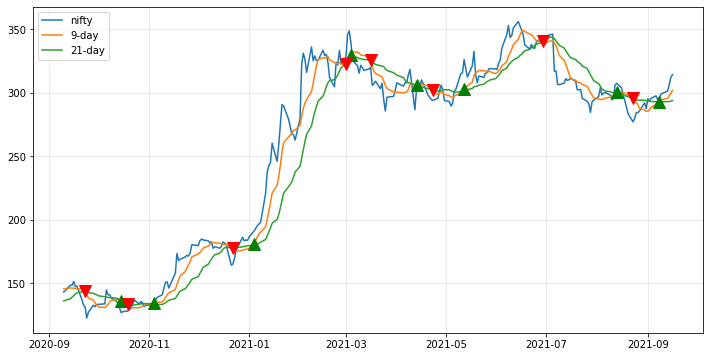

In [6]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df.iloc[-252:]['Close'], label = 'nifty')
plt.plot(df.iloc[-252:]['9-day'], label = '9-day')
plt.plot(df.iloc[-252:]['21-day'], label = '21-day')
plt.plot(df[-252:].loc[df.entry == 2].index, df[-252:]['9-day'][df.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(df[-252:].loc[df.entry == -2].index, df[-252:]['21-day'][df.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

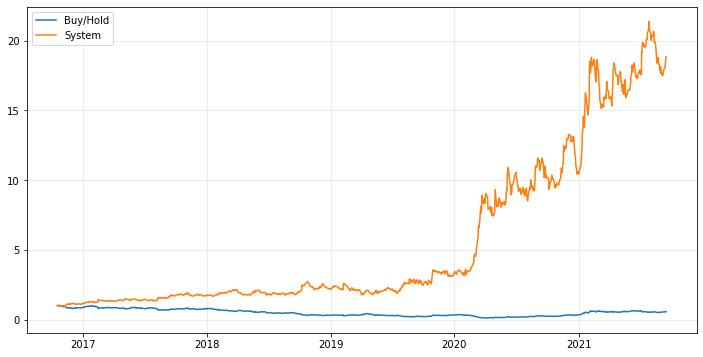

In [7]:
plt.plot(np.exp(df['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [8]:
np.exp(df['return']).cumprod()[-1] -1

-0.42617109083777205

In [9]:
np.exp(df['system_return']).cumprod()[-1] -1

17.837738972382525

In [ ]:
#STRATEGY HAS OUTPERFORMED BUY/HOLD